# Project: <span style="color:#00b2b2">Investigate a Dataset</span>
### Dataset : <span style="color:#00b2b2">TMDb movie data</span>
### <span style="color:#4f5b66">Part of Udacity Data Analyst Nanondegee Term 1</span>
***

## Introduction
In this project, we will perform an exploratory analysis on data provided by Udacity and will answer the questions.

### About the Data Set :
> <span style="color:#780055">This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.</span><br>

> <span style="color:#780055">This data set is cleaned from original data on Kaggle by Udacity.</span><br>

> <span style="color:#780055">The origianl source of data can be found on </span>__[Kaggle](https://www.google.com/url?q=https://www.kaggle.com/tmdb/tmdb-movie-metadata&sa=D&ust=1510505068247000&usg=AFQjCNHUWPQZn-wWxJuO1aB_t85SNHxi_g)__<br>

### Posing Questions :
1. What is lowest runtime for a movie?
2. What is maximum runtime for a movie?
3. Which movies have lowest runtime?
4. Which movies have highest rumtime?
5. Top 10 Keywords?
6. Top 10 Genres?
7. Genre trend over a period of time 1960-2015?
8. Top 10 Production comapnies?
9. Trends for Budget, Revenue, Profit over the year 1960-2015?
10. How many movies fall in the category of Low,Okay,Good,Great every year?
11. Most active month of the year when most of the movies are released?
12. In which month cinema makes most of its profit?
***

## Data Wrangling
Now it's time to collect and explore our data.


In [1]:
#Importing Packages
import pandas as pd                #For data manipulation and analysis
import numpy as np                 #Adding support for large, multi-dimensional arrays and matrices
import matplotlib.pyplot as plt    #Plotting library
%matplotlib inline
import seaborn as sns              #Python visualization library based on matplotlib
import plotly.plotly as py         #Online data analytics and visualization tool
import plotly.graph_objs as go
import cufflinks as cf
from plotly.offline import init_notebook_mode, iplot 
init_notebook_mode(connected=True) #Enabling Offline function for plotly
import pprint                      #Provides a capability to “pretty-print” arbitrary Python data structures


In [2]:
df_mov = pd.read_csv('tmdb-movies.csv')

<span style="color:#ff79a7">There is lot of data for us to investigate, so it's a good idea to start off by looking at one entry</span>
***

In [3]:
df_mov.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
df_mov.shape

(10866, 21)

<span style="color:#ff79a7">Our Data set has </span>10866<span style="color:#ff79a7"> movies and each movie is associated with </span> 21<span style="color:#ff79a7"> particularity </span>
***

<span style="color:#ff79a7">We will find concise summary of a data set, It is important that we know everything about our data so to investigate dataset more properly.</span>


In [5]:
# Getting Datatypes for each column 
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<span style="color:#ff79a7">We have data of type</span> **float**, **int**, **object**<br> 
<span style="color:#ff79a7">We will investigate type </span> **object**
***

In [6]:
# Checking the data type which were found to be object type
columnObjectType = ['imdb_id', 'original_title', 'cast', 'homepage', 'director', 'tagline',
                    'keywords','overview','genres','production_companies','release_date']
for i in columnObjectType:
    print(type(df_mov[i][0]))

<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>


<span style="color:#ff79a7">All the dtypes that are object are of type </span>**string**
***

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) #Suppress Scientific Notation from Python Pandas
df_mov.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


<span style="color:#ff79a7">If we take a closer look at the data we can see that</span> **minimum** <span style="color:#ff79a7">value of </span>**budget**, **revenue**, **runtime**, **budget_adj**, **revenue_adj** <span style="color:#ff79a7">is</span> **zero** <span style="color:#ff79a7"> Which is not possible </span>
<br><br>
<span style="color:#c10000">This can lead to wrong answers to our questions about the dataset!!!</span>

***

<span style="color:#ff79a7"> Displaying all the movies with runtime 0 this will tell us which movies have wrong runtime and in cleaning process we will remove these movies</span>

In [8]:
# Movies with runtime 0
print("--------Movies with runtime 0--------")
df_mov.loc[df_mov['runtime']==0].original_title

--------Movies with runtime 0--------


92           Mythica: The Necromancer
334                           Ronaldo
410                    Anarchy Parlor
445     The Exorcism of Molly Hartley
486                If There Be Thorns
595                         Deep Dark
616                      The Outfield
1241                        Dance-Off
1289                        Treehouse
1293                         Tim Maia
1849                     Spectacular!
2315             Listen to Your Heart
2370                  Freshman Father
3329         Grande, grosso e Verdone
3794             Toi, moi, les autres
3857                         Cell 213
3884                           eCupid
4063           Madea's Family Reunion
4138               A Time for Dancing
4829                             Rags
4944              How to Fall in Love
5216            Madea's Class Reunion
5695                 Skinwalker Ranch
5920           The Food Guide to Love
5938                      Go Goa Gone
5992                 Amiche da morire
6040        

<span style="color:#ff79a7"> Displaying all the movies with budget 0 this will tell us which movies have wrong budget and in cleaning process we will remove these movies</span>

In [9]:
# Movies with budget 0
print("-----------------Movies with budget 0-----------------")
df_mov.loc[df_mov['budget']==0].original_title

-----------------Movies with budget 0-----------------


30                                             Mr. Holmes
36                                                 Solace
72                                       Beyond the Reach
74                                 Mythica: The Darkspore
75                         Me and Earl and the Dying Girl
88                                                 Equals
92                               Mythica: The Necromancer
95                 Alvin and the Chipmunks: The Road Chip
100                                          Frozen Fever
101                                             High-Rise
103                              Spooks: The Greater Good
116                    The Scorpion King: The Lost Throne
119                                   Absolutely Anything
122                                                Everly
125                                             Slow West
128                                      Mistress America
130                                            True Story
132           

<span style="color:#ff79a7"> Displaying all the movies with revenue 0 this will tell us which movies have wrong revenue and in cleaning process we will remove these movies</span>

In [10]:
# Movies with revenue 0
print("-----------------Movies with revenue 0-----------------")
df_mov.loc[df_mov['revenue']==0].original_title

-----------------Movies with revenue 0-----------------


48                                              Wild Card
67                                               Survivor
74                                 Mythica: The Darkspore
75                         Me and Earl and the Dying Girl
92                               Mythica: The Necromancer
93                                                   Vice
100                                          Frozen Fever
101                                             High-Rise
103                              Spooks: The Greater Good
116                    The Scorpion King: The Lost Throne
122                                                Everly
133                                     Louder Than Bombs
140                   Dragonheart 3: The Sorcerer's Curse
143                                  Brothers of the Wind
145                                         Bone Tomahawk
147                                        Pawn Sacrifice
149                                              Momentum
151           

In [11]:
#<font color=#ff79a7></font>

In [12]:
#Searching for duplicate data
print("Number of duplicate rows: {}\n\n".format(sum(df_mov.duplicated())))
print("Number of Null values in each column:\n")
pprint.pprint(dict(zip(list(df_mov.columns),[i for i in sum(df_mov.isnull().values)])))

Number of duplicate rows: 1


Number of Null values in each column:

{'budget': 0,
 'budget_adj': 0,
 'cast': 76,
 'director': 44,
 'genres': 23,
 'homepage': 7930,
 'id': 0,
 'imdb_id': 10,
 'keywords': 1493,
 'original_title': 0,
 'overview': 4,
 'popularity': 0,
 'production_companies': 1030,
 'release_date': 0,
 'release_year': 0,
 'revenue': 0,
 'revenue_adj': 0,
 'runtime': 0,
 'tagline': 2824,
 'vote_average': 0,
 'vote_count': 0}


#### Columns that have null values are
1. cast
2. director
3. genres
4. hompage
5. imdb_id
6. keywords
7. overview
8. production_companies
9. tagline
***

<span style="color:#ff79a7"> Displaying dupicate rows as it can cause</span> Ineffficency, Lack of Productivity  Inaccurate Reporting <span style="color:#ff79a7">and</span> Less Informed Decisions

In [13]:
#Listing all duplicate rows
df_mov[df_mov.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.60,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,30000000.00,967000.00
2090,42194,tt0411951,0.60,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.00,2010,30000000.00,967000.00


***
## Data Cleaning
### We will go through followind steps to complete this process
1. Remove the columns that we are not interested for now and that would be
 - imdb_id
 - popularity
 - homepage
 - overview
 - vote_count
 - budget_adj
 - revenue_adj
2. Remove duplicate rows as it causes Ineffficency, Inaccurate Reporting and Less Informed Decisions.
3. Setting new categorical column (makes grouping easy).
4. Droping movies with budget, revenue or both equal to zero and store as different DataFrame(Beacuse it will give false Descriptive Statistical values.
5. Converting data type of release_data to Timestamp (so that inbuild methods could be used on dates).
6. Setting new month column
***
 

In [14]:
# Dropping columns
df_mov.drop(['imdb_id', 'popularity', 'homepage', 'overview', 'vote_count', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)

In [15]:
# Dropping duplicates
df_mov.drop_duplicates(inplace=True)
# Verifying for the same
print("Number of duplicate rows: {}".format(sum(df_mov.duplicated())))

Number of duplicate rows: 0


In [16]:
bin_names = [1.50, 5.40, 6.00, 6.60, 9.20]
group_names = ['Low', 'Okay', 'Good', 'Great']
df_mov['categorical_rating'] = pd.cut(df_mov['vote_average'], bins=bin_names, labels=group_names)
df_mov.head()

,id,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,categorical_rating
0,135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.50,2015,Good
1,76341,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.10,2015,Great
2,262500,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,6.30,2015,Good
3,140607,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,7.50,2015,Great
4,168259,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,7.30,2015,Great


In [17]:
#Converting datatype of release_date column from str to timestamp
df_mov['release_date']=pd.to_datetime(df_mov['release_date'])
type(df_mov['release_date'][0])

pandas._libs.tslib.Timestamp

In [18]:
#Adding new column month that tell month when movie was released
df_mov['month'] = df_mov['release_date'].dt.strftime('%b')

In [19]:
# Droping data set with runtime 0
df_mov_drop_runtime=df_mov.drop(df_mov.loc[df_mov['runtime']==0].index, inplace=False)
# Checking for the same
df_mov_drop_runtime.loc[df_mov['runtime']==0]

,id,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,categorical_rating,month


In [20]:
# Droping data set with budget 0
df_mov_drop_budget=df_mov.drop(df_mov.loc[df_mov['budget']==0].index, inplace=False)
# Checking for the same
df_mov_drop_budget.loc[df_mov['budget']==0]

,id,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,categorical_rating,month


In [21]:
# Droping data set with revenue 0
df_mov_drop_revenue=df_mov.drop(df_mov.loc[df_mov['revenue']==0].index, inplace=False)
# Checking for the same
df_mov_drop_revenue.loc[df_mov['revenue']==0]

,id,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,categorical_rating,month


In [22]:
# Droping both Budget and revenue
df_drop_bud_rev=df_mov.drop(df_mov.loc[df_mov['budget']==0].index, inplace=False)
df_drop_bud_rev.drop(df_drop_bud_rev.loc[df_drop_bud_rev['revenue']==0].index, inplace=True)

***
### Verifying Data Cleaning Process

In [23]:
df_mov.head(1)

,id,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_average,release_year,categorical_rating,month
0,135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.50,2015,Good,Jun


In [24]:
print("Number of Null values in each column:\n")
pprint.pprint(dict(zip(list(df_mov.columns),[i for i in sum(df_mov.isnull().values)])))

Number of Null values in each column:

{'budget': 0,
 'cast': 76,
 'categorical_rating': 2,
 'director': 44,
 'genres': 23,
 'id': 0,
 'keywords': 1493,
 'month': 0,
 'original_title': 0,
 'production_companies': 1030,
 'release_date': 0,
 'release_year': 0,
 'revenue': 0,
 'runtime': 0,
 'tagline': 2824,
 'vote_average': 0}


***

## Exploratory Data Analysis
Now that we have the data collected and wrangled, we are ready to start exploring the data. In this section we will write some code to compute descriptive statistics from the data. we will also create some basic plots of the data.

***

In [25]:
# Calculating maximum and minimum runtime
min_runtime=df_mov_drop_runtime['runtime'].min()
max_runtime=df_mov_drop_runtime['runtime'].max()

# Listing all movie with maximum and minimum runtime
print("Movies with shortest runtime of {}min: \n".format(min_runtime))
for i in list(df_mov_drop_runtime.loc[df_mov_drop_runtime.runtime == min_runtime, 'original_title']):
    print("    "+i)
print("\nMovies with longest runtime of {}min: \n".format(max_runtime))
for i in list(df_mov_drop_runtime.loc[df_mov_drop_runtime.runtime == max_runtime, 'original_title']):
    print("    "+i)

Movies with shortest runtime of 2min: 

    Fresh Guacamole
    Cousin Ben Troop Screening
    The Adventures of AndrÃ© and Wally B.
    Luxo Jr.
    Bambi Meets Godzilla

Movies with longest runtime of 900min: 

    The Story of Film: An Odyssey


In [26]:
# A General funcation which give you top 10 values and unique values in any column provided to it.
def topleastTen(column_name, sort_by):
    
    all_attribute=df_mov[column_name].str.cat(sep='|')
    all_attribute=pd.Series(all_attribute.split('|'))
    count=all_attribute.value_counts(ascending=False)
    if sort_by==True:
        print("Total Number of {}: {}".format(column_name, count.size))
        print("\nTop 10 {} with most movies: ".format(column_name))
        print(count.head(10))
    else:
        print("\nLeast 10 {} with most movies: ".format(column_name))
        print(count.tail(10))

In [27]:
#Exploring column keyword
topleastTen('keywords', True)
topleastTen('keywords', False)

Total Number of keywords: 7878

Top 10 keywords with most movies: 
woman director      413
independent film    396
based on novel      278
sex                 272
sport               216
murder              204
biography           169
musical             169
new york            163
suspense            159
dtype: int64

Least 10 keywords with most movies: 
dancing scene        1
martha's vineyard    1
beauty pageant       1
shape shifter        1
tageszeitung         1
car parts            1
weightlifting        1
western              1
praline              1
sleepwalking         1
dtype: int64


In [28]:
#Exploring column genres
topleastTen('genres', True)
topleastTen('genres', False)

Total Number of genres: 20

Top 10 genres with most movies: 
Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
dtype: int64

Least 10 genres with most movies: 
Fantasy        916
Mystery        810
Animation      699
Documentary    520
Music          408
History        334
War            270
Foreign        188
TV Movie       167
Western        165
dtype: int64


In [29]:
all_genres = df_mov['genres'].str.cat(sep='|')
all_genres = pd.Series(all_genres.split('|'))
count = all_genres.value_counts(ascending=False)
trace = go.Pie(labels=list(count.index), values=list(count.values))
iplot([trace], filename='basic_pie_chart')

<span style="color:#ff79a7">Now we will visualize the genre using line plot that will give variation of each genre over the year</span>

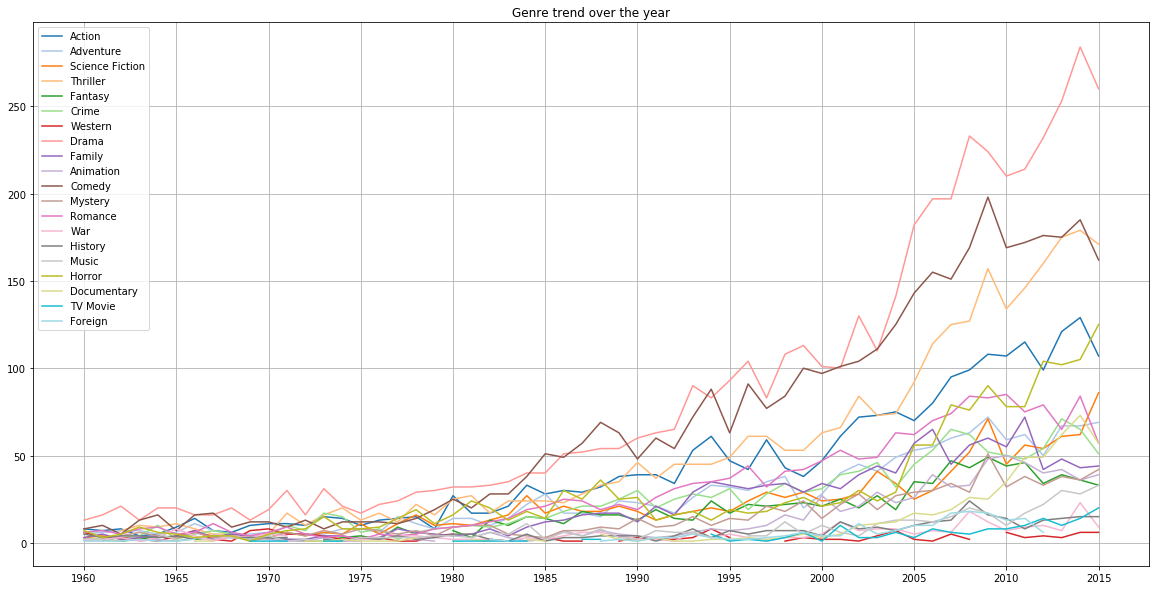

In [30]:
# Geeting list of all Genres
all_genres = df_mov['genres'].str.cat(sep='|')
all_genres = pd.Series(all_genres.split('|'))
genres_list = all_genres.unique()
plt.rcParams['figure.figsize'] = (20.0, 10.0)
NUM_COLORS = 20
cm = plt.get_cmap('tab20')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_prop_cycle(plt.cycler('color', cm(np.linspace(0, 1, NUM_COLORS))))

def genre_trend(input_genre):
    temp_dic={}
    for name, group in df_mov.groupby('release_year'): 
        key=name
        value=(pd.Series(group.genres.str.cat(sep='|').split('|')).value_counts(ascending=False).get(input_genre))
        temp_dic[key]=value
    dates = list(temp_dic.keys())
    prices = list(temp_dic.values())    
    ax.plot(dates, prices)
    plt.grid()
    plt.title(input_genre)
    plt.xticks(np.arange(1960,2020,5))
    
for genre in genres_list:
    genre_trend(genre)
    
plt.legend(genres_list, loc='upper left')
plt.title('Genre trend over the year')
plt.grid()
plt.show()

In [31]:
#Exploring column production companies
topleastTen('production_companies', True)
topleastTen('production_companies', False)

Total Number of production_companies: 7879

Top 10 production_companies with most movies: 
Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      214
Touchstone Pictures                       178
Columbia Pictures Corporation             160
dtype: int64

Least 10 production_companies with most movies: 
403 Productions                    1
Alfran Productions                 1
Westward Productions               1
Showtime Australia                 1
FishCorb Films                     1
Cofimage 7                         1
Production I.G.                    1
School of Life Productions Inc.    1
Mr.Monster                         1
Producciones de la 5ta Avenida     1
dtype: int64


/Users/utkarshtrehan/anaconda/envs/DAND/lib/python2.7/site-packages/pandas/plotting/_core.py:1714: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



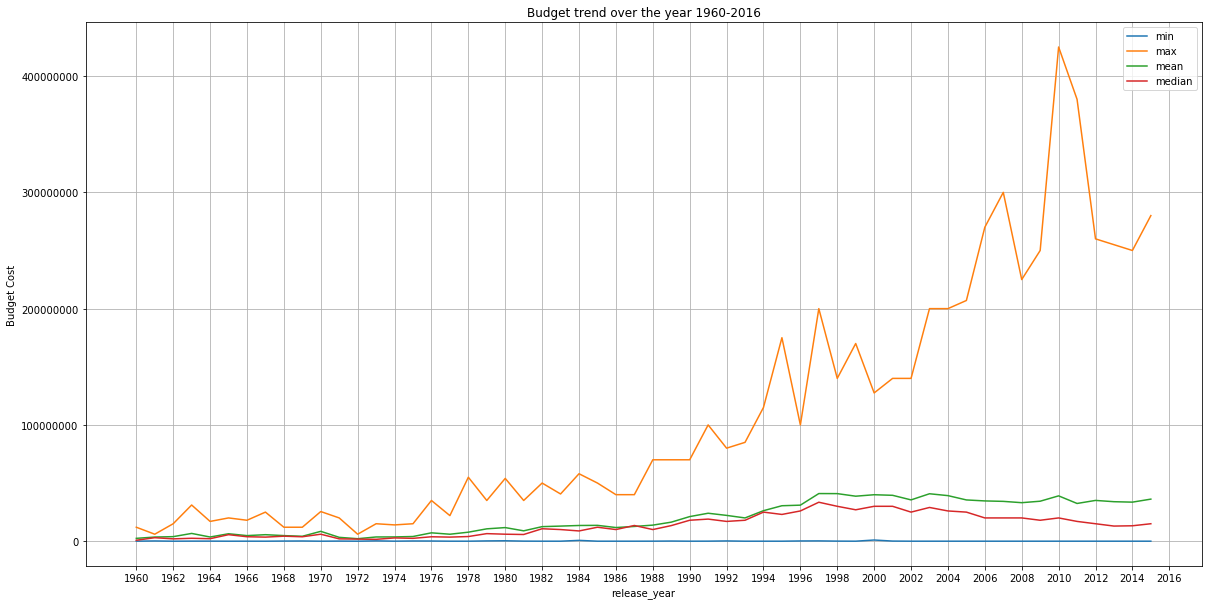

In [32]:
#Exploring Budget 
df_budget_describe = df_mov_drop_budget.groupby('release_year').budget.describe()
df_budget_describe.plot(y=['min', 'max','mean','50%'], kind='line', grid=True, xticks=np.arange(1960,2017,2))
plt.ticklabel_format(style='plain')
plt.title('Budget trend over the year 1960-2016')
plt.ylabel('Budget Cost')
plt.legend().get_texts()[3].set_text('median')
plt.show()

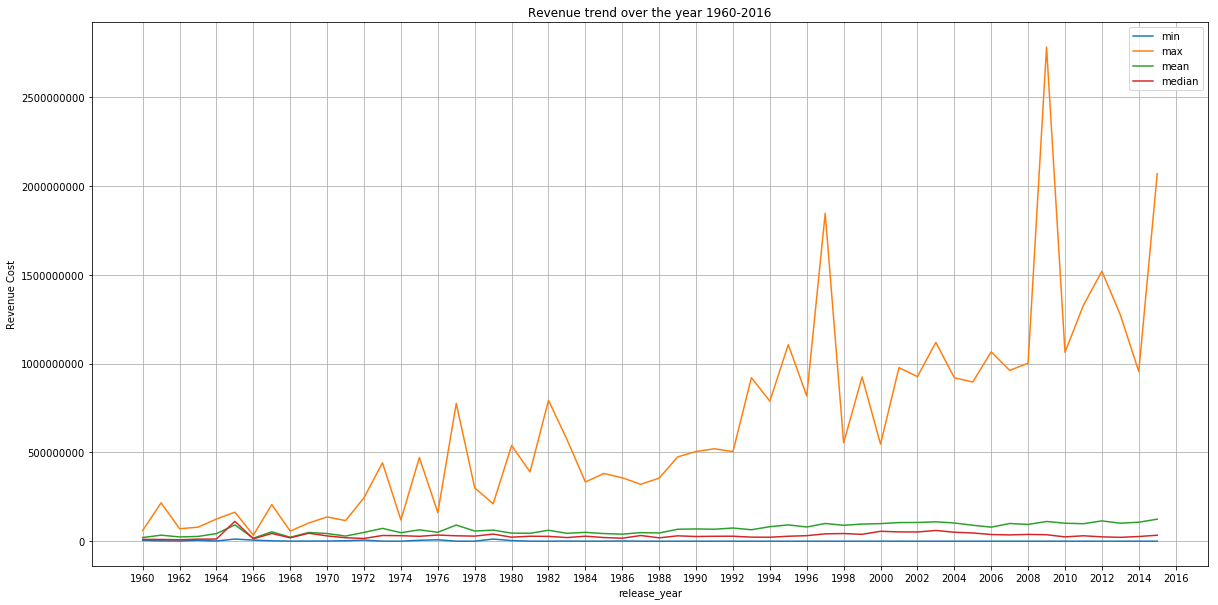

In [33]:
#Exploring Revenue
df_revenue_describe = df_mov_drop_revenue.groupby('release_year').revenue.describe()
df_revenue_describe.plot(y=['min', 'max','mean', '50%'], kind='line', grid=True, xticks=np.arange(1960,2017,2))
plt.ticklabel_format(style='plain')
plt.title('Revenue trend over the year 1960-2016')
plt.legend().get_texts()[3].set_text('median')
plt.ylabel('Revenue Cost')
plt.show()

### <span style="color:#ff79a7">As we can see that there is lot of outliers that causes mean to have greater value, so we will use medain to analyze Budget and Revenue trend</span>

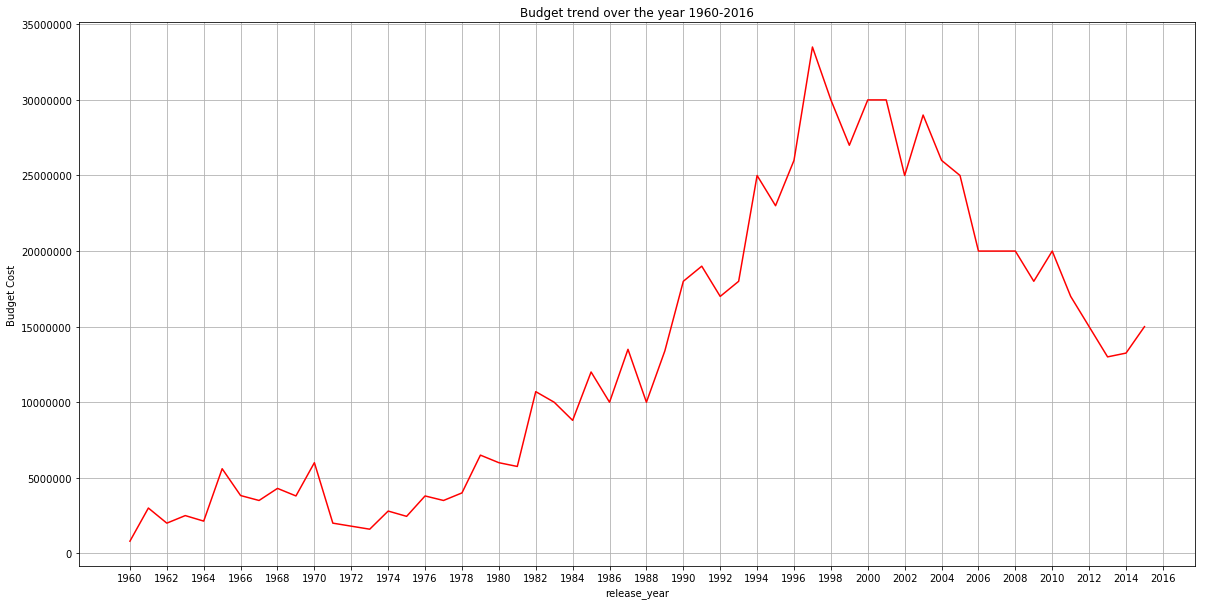

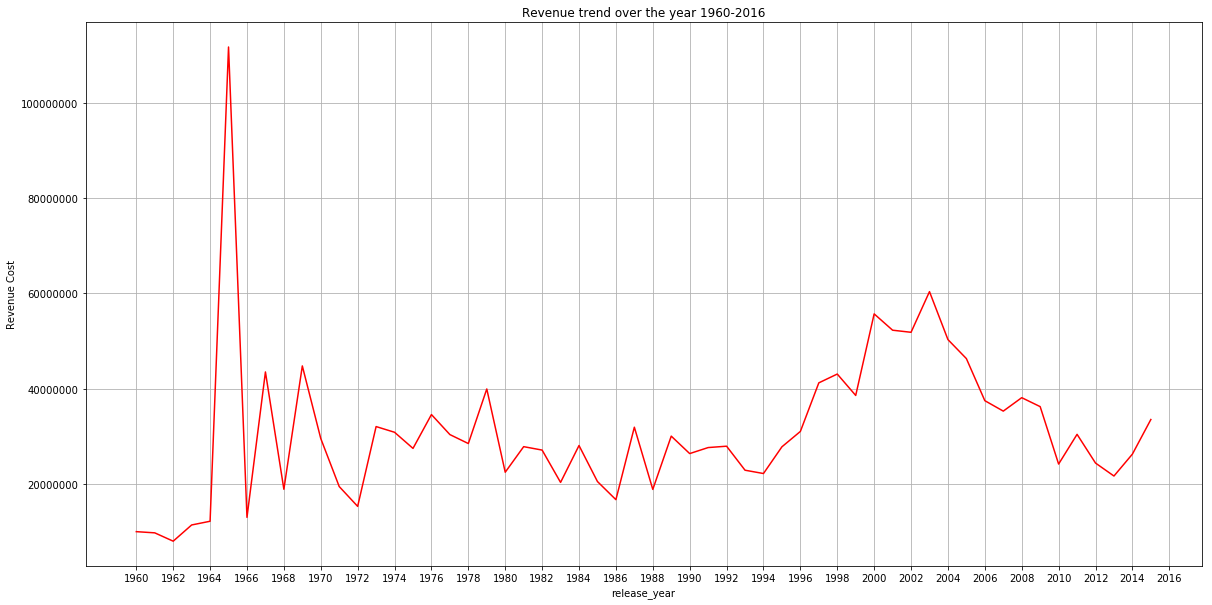

In [34]:
# Line plot for mean budget
df_budget_describe.plot(y=['50%'], kind='line', grid=True, color='red',legend=False, xticks=np.arange(1960,2017,2))
plt.title('Budget trend over the year 1960-2016')
plt.ylabel('Budget Cost')
plt.ticklabel_format(style='plain')
plt.show()
# Line plot for mean revenue
df_revenue_describe.plot(y=['50%'], kind='line', grid=True, color='red',legend=False, xticks=np.arange(1960,2017,2))
plt.title('Revenue trend over the year 1960-2016')
plt.ticklabel_format(style='plain')
plt.ylabel('Revenue Cost')
plt.show()

<h3 style="color:#ff79a7">The interactive visualization below wil give you number of movies that were Low,Okay,Good,Great for every year. We could also see the number of movies produced each year.</h3>

In [35]:
df_temp=df_mov.groupby(['release_year', 'categorical_rating']).size().reset_index(name='counts').set_index('release_year')
df_categorical_trend = df_temp.pivot_table('counts', ['release_year'], 'categorical_rating')
cf.set_config_file(offline=False, world_readable=True, theme='ggplot')
df_categorical_trend.iplot(kind='bar')

<span style="color:#ff79a7">Calculating median Budget, Revenue, Runtime based on categorical_rating</span>

In [36]:
df_drop_bud_rev.groupby('categorical_rating').median().drop(labels=['id','vote_average','release_year'],axis=1)

,budget,revenue,runtime
categorical_rating,,,
Low,24000000.00,23438120.00,97.00
Okay,26500000.00,45678755.50,103.50
Good,25000000.00,50907422.00,107.00
Great,18000000.00,60144956.00,115.00


<span style="color:#ff79a7">Here we see postive relation between revenue and movie rating but that is not true for budget. We may say that high rated movies always tends to have greater revenue but it is not same for budget.Even there is positive relation with runtime. </span>

### Most acitve month for release of a movie

In [37]:
df_month = df_mov.month.value_counts()
labels = list(df_month.index)
values = list(df_month.values)
trace = go.Pie(labels=labels, values=values)
py.iplot([trace], filename='basic_pie_chart')

<span style="color:#ff79a7">Calculating median Budget, Revenue based for each month</span>

In [38]:
df_temp=df_drop_bud_rev.groupby('month').median().drop(labels=['id','vote_average','release_year','runtime'],axis=1)
df_temp['profit']=df_temp['revenue']-df_temp['budget']
df_temp

,budget,revenue,profit
month,,,
Apr,21150000.00,40346186.00,19196186.00
Aug,20000000.00,37170057.00,17170057.00
Dec,28000000.00,74188937.00,46188937.00
Feb,23000000.00,40485039.00,17485039.00
Jan,15000000.00,29010817.00,14010817.00
Jul,26000000.00,66986817.00,40986817.00
Jun,32500000.00,90607779.00,58107779.00
Mar,25000000.00,49779728.00,24779728.00
May,25000000.00,54674226.00,29674226.00


<span style="color:#ff79a7">Here we can say that most of the profit is in month of Jun and least in September</span>

***
## Conclusions
As we haven't done any statistical tests,we  do not imply any statistical conclusions. And make sure to avoid implying causation from correlation!</br>
The data set had lot of missing values about 6016 movies had 0 revenue and 5696 movies with budget 0 even 30 movies with 0 runime. Hence The statistic we have founded may vary and give some other patterns when all data is available
***
The results we get from using Descriptive Statistics are:
1. What is lowest runtime for a movie? >
>2 minutes
2. What is maximum runtime for a movie? 
>900 minutes
3. Which movies have lowest runtime?
  >Fresh Guacamole, <br>
  >Cousin Ben Troop Screening, <br>
  >The Adventures of AndrÃ© and Wally B., <br>
  >Luxo Jr., <br>
  >Bambi Meets Godzilla.
4. Which movies have highest rumtime?
  >The Story of Film: An Odyssey
5. Top 10 Keywords?
  >woman director    
  >independent film    
  >based on novel      
  >sex                 
  >sport             
  >murder             
  >biography          
  >musical            
  >new york           
  >suspense            
6. Top 10 Genres?
  >Drama              
  >Comedy         
  >Thriller       
  >Action         
  >Romance        
  >Horror         
  >Adventure      
  >Crime          
  >Family         
  >Science Fiction
8. Top 10 Production comapnies?
  >Universal Pictures                    
  >Warner Bros.                          
  >Paramount Pictures                    
  >Twentieth Century Fox Film Corporation
  >Columbia Pictures                     
  >New Line Cinema                       
  >Metro-Goldwyn-Mayer (MGM)             
  >Walt Disney Pictures                  
  >Touchstone Pictures                   
  >Columbia Pictures Corporation      
9. About Budget Analysis:-
  >Maximum Median Budget per year was made in 1997<br>
  >Minimum Median Budget per year was made in 1960<br>
  >Maximum Budget per Year was made in 2010
10. About Reveneue Analysis:-
  >Maximum Average Revenue per year was made in 1965<br>
  >Minimum Average Revenue per year was made in 1962<br>
  >Maximum Revenue per Year was made in 2009<br>
11. About Profit Analysis:-
  >Maximum Average Profit per year was made in 1965<br>
***